Insert libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Load data set

In [3]:
data = pd.read_csv("../data/SeoulBikeData.csv")
data.head(6)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,Winter,No Holiday,Yes


Exploration and Preprocessing

In [7]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [13]:
cat_col = [col for col in data.columns if data[col].dtype == "object"]
print(cat_col)

num_col = [col for col in data.columns if data[col].dtype != "object"]
print(num_col)

['Date', 'Seasons', 'Holiday', 'Functioning Day']
['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [14]:
data[num_col].nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
dtype: int64

In [15]:
data[cat_col].nunique()

Date               365
Seasons              4
Holiday              2
Functioning Day      2
dtype: int64

In [20]:
# Split data by Seasons
df_spring = data.loc[data.Seasons == "Spring"]
df_summer = data.loc[data.Seasons == "Summer"]
df_autumn = data.loc[data.Seasons == "Autumn"]
df_winter = data.loc[data.Seasons == "Winter"]

In [38]:
# Define 3 times of the day
morning = [6, 7, 8, 9, 10, 11, 12]
afternoon = [13, 14, 15, 16, 17]
evening = [18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5]

In [49]:
# Compute the sum of rented bike by time of the day in Spring
sum_rentedbike_by_time_in_spring = [sum(df_spring.loc[df_spring.Hour == i]["Rented Bike Count"]) for i in range(24)]

# Compute the average of rented bike in 3 times of the day
morning_in_spring = sum([sum_rentedbike_by_time_in_spring[i] for i in morning])/len(morning)
afternoon_in_spring = sum([sum_rentedbike_by_time_in_spring[i] for i in afternoon])/len(afternoon)
evening_in_spring = sum([sum_rentedbike_by_time_in_spring[i] for i in evening])/len(evening)

print(morning_in_spring)
print(afternoon_in_spring)
print(evening_in_spring)

60017.42857142857
93819.0
60224.333333333336


In [50]:
# Compute the sum of rented bike by time of the day in Summer
sum_rentedbike_by_time_in_summer = [sum(df_summer.loc[df_summer.Hour == i]["Rented Bike Count"]) for i in range(24)]

# Compute the average of rented bike in 3 times of the day
morning_in_summer = sum([sum_rentedbike_by_time_in_summer[i] for i in morning])/len(morning)
afternoon_in_summer = sum([sum_rentedbike_by_time_in_summer[i] for i in afternoon])/len(afternoon)
evening_in_summer = sum([sum_rentedbike_by_time_in_summer[i] for i in evening])/len(evening)

print(morning_in_summer)
print(afternoon_in_summer)
print(evening_in_summer)

80231.14285714286
101109.0
101339.25


In [51]:
# Compute the sum of rented bike by time of the day in Autumn
sum_rentedbike_by_time_in_autumn = [sum(df_autumn.loc[df_autumn.Hour == i]["Rented Bike Count"]) for i in range(24)]

# Compute the average of rented bike in 3 times of the day
morning_in_autumn = sum([sum_rentedbike_by_time_in_autumn[i] for i in morning])/len(morning)
afternoon_in_autumn = sum([sum_rentedbike_by_time_in_autumn[i] for i in afternoon])/len(afternoon)
evening_in_autumn = sum([sum_rentedbike_by_time_in_autumn[i] for i in evening])/len(evening)

print(morning_in_autumn)
print(afternoon_in_autumn)
print(evening_in_autumn)

67001.57142857143
98403.4
69081.16666666667


In [52]:
# Compute the sum of rented bike by time of the day in Winter
sum_rentedbike_by_time_in_winter = [sum(df_winter.loc[df_winter.Hour == i]["Rented Bike Count"]) for i in range(24)]

# Compute the average of rented bike in 3 times of the day
morning_in_winter = sum([sum_rentedbike_by_time_in_winter[i] for i in morning])/len(morning)
afternoon_in_winter = sum([sum_rentedbike_by_time_in_winter[i] for i in afternoon])/len(afternoon)
evening_in_winter = sum([sum_rentedbike_by_time_in_winter[i] for i in evening])/len(evening)

print(morning_in_winter)
print(afternoon_in_winter)
print(evening_in_winter)

21311.285714285714
27167.0
16846.25


Review: In all seasons, bikes are most rented in the afternoon

In [99]:
g_spring = df_spring.groupby("Temperature(°C)", as_index = False).sum()
g_summer = df_summer.groupby("Temperature(°C)", as_index = False).sum()
g_autumn = df_autumn.groupby("Temperature(°C)", as_index = False).sum()
g_winter = df_winter.groupby("Temperature(°C)", as_index = False).sum()

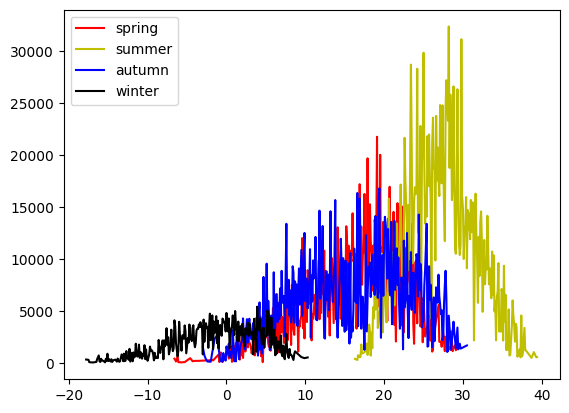

In [111]:
count_spring = g_spring["Rented Bike Count"]
temperatures_spring = g_spring["Temperature(°C)"]

count_summer = g_summer["Rented Bike Count"]
temperatures_summer = g_summer["Temperature(°C)"]

count_autumn = g_autumn["Rented Bike Count"]
temperatures_autumn = g_autumn["Temperature(°C)"]

count_winter = g_winter["Rented Bike Count"]
temperatures_winter = g_winter["Temperature(°C)"]

plt.plot(temperatures_spring, count_spring, label="spring", color="r")
plt.plot(temperatures_summer, count_summer, label="summer", color="y")
plt.plot(temperatures_autumn, count_autumn, label="autumn", color="b")
plt.plot(temperatures_winter, count_winter, label="winter", color="k")
plt.legend()
plt.show()

In [112]:
print(num_col)

['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [114]:
correlation = data.corr(method="pearson", numeric_only=True)
print(correlation["Rented Bike Count"])

Rented Bike Count            1.000000
Hour                         0.410257
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Name: Rented Bike Count, dtype: float64


The feature has the most correlation is Temperature(°C) and it is a moderate correlation

In [5]:
data["Rented Bike Count"].max()

np.int64(3556)

In [18]:
data[data["Rented Bike Count"] <= 900].count()

Date                         5952
Rented Bike Count            5952
Hour                         5952
Temperature(°C)              5952
Humidity(%)                  5952
Wind speed (m/s)             5952
Visibility (10m)             5952
Dew point temperature(°C)    5952
Solar Radiation (MJ/m2)      5952
Rainfall(mm)                 5952
Snowfall (cm)                5952
Seasons                      5952
Holiday                      5952
Functioning Day              5952
dtype: int64